In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches_new = pd.read_csv('matches_new.csv')

In [3]:
matches_new.head()

,match week,date_time,team,xg,score,xg.1,opponent,stadium,home_team_score,away_team_score,result,opp_code,day_code,venue_code,target,season,total_wins,total_goals,appearances
0,1,2022-06-09 18:45:00,Dinamo Zagreb,0.6,1-0,0.9,Chelsea FC,Stadion Maksimir,1,0,W,7,3,1,1,2023,1.0,83,32
1,1,2022-06-09 18:45:00,Borussia Dortmund,2.3,3-0,0.5,FC Copenhagen,Signal Iduna Park,3,0,W,12,3,1,1,2023,21.0,9,15
2,1,2022-06-09 18:45:00,Celtic FC,1.4,0-3,1.9,Real Madrid,Celtic Park,0,3,L,24,3,1,2,2023,1.0,67,27
3,1,2022-06-09 18:45:00,SL Benfica,1.1,2-0,0.2,Maccabi Haifa,Estádio do Sport Lisboa e Benfica,2,0,W,17,3,1,1,2023,10.0,26,16
4,1,2022-06-09 21:00:00,RB Salzburg,1.3,1-1,0.9,AC Milan,Red Bull Arena,1,1,D,0,3,1,0,2023,6.0,9,15


In [4]:
# check the format of the datetime column
format_str = pd.to_datetime(matches_new['date_time'], infer_datetime_format=True).dt.strftime('%Y-%m-%d %H:%M:%S').iloc[0]
print(f'The format of datetime values in the column is: {format_str}')


The format of datetime values in the column is: 2022-06-09 18:45:00


In [5]:
# convert the datetime column to datetime dtype
matches_new['date_time'] = pd.to_datetime(matches_new['date_time'])

In [6]:
matches_new.dtypes

match week                  int64
date_time          datetime64[ns]
team                       object
xg                        float64
score                      object
xg.1                      float64
opponent                   object
stadium                    object
home_team_score             int64
away_team_score             int64
result                     object
opp_code                    int64
day_code                    int64
venue_code                  int64
target                      int64
season                      int64
total_wins                float64
total_goals                 int64
appearances                 int64
dtype: object

In [7]:
import pandas as pd

matches = pd.read_csv("matches.csv")

In [8]:
matches.head()

,match_id,season,date_time,team,opponent,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,result,timestamp,opp_code,day_code,venue_code,target,total_wins,total_goals,appearances
0,mt1,2021,2021-09-15 20:00:00,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,W,1.631736e+09,55,2,1,1,40.0,83,32
1,mt2,2021,2021-09-15 20:00:00,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546,D,1.631736e+09,53,2,1,0,4.0,9,15
2,mt3,2021,2021-09-28 20:00:00,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350,W,1.632859e+09,45,1,1,1,31.0,67,27
3,mt4,2021,2021-09-28 20:00:00,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500,L,1.632859e+09,19,1,1,2,14.0,26,16
4,mt5,2021,2021-10-19 17:45:00,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915,L,1.634666e+09,45,1,1,2,4.0,9,15


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [11]:
import joblib

# Load the trained Logistic Regression model
lr = joblib.load('match_prediction_model_lr_test2.joblib')

In [12]:
train=matches[matches["date_time"]< '2022-06-01']

In [13]:
test = matches_new[matches_new["date_time"] > '2022-06-01']

In [56]:
# Define the predictors
predictors = ["venue_code", "opp_code", "day_code", "total_wins", "appearances"]

In [57]:
lr.fit(train[predictors], train["target"])

LogisticRegression(max_iter=1000)

In [58]:
preds=lr.predict(test[predictors])

In [59]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test["target"], preds)
print("Accuracy:", accuracy)


Accuracy: 0.40860215053763443


In [60]:
result_df = pd.concat([test['target'], pd.Series(preds, name='predicted', index=test.index)], axis=1)
print(result_df)

     target  predicted
0         1          1
1         1          2
2         2          1
3         1          2
4         0          2
..      ...        ...
119       0          1
120       0          1
121       0          1
122       0          2
123       0          1

[93 rows x 2 columns]


In [61]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test["target"], preds)
print(cm)


[[ 0 13 12]
 [ 0 20 20]
 [ 0 10 18]]


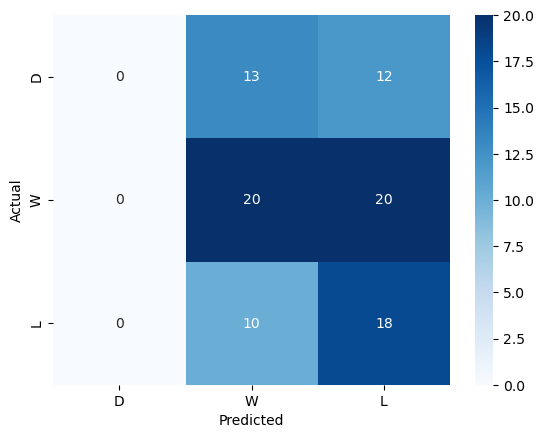

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["D", "W", "L"], yticklabels=["D", "W", "L"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [64]:
pd.crosstab(index=combined["actual"], columns= combined["prediction"])

prediction,1,2
actual,,
0,13,12
1,20,20
2,10,18


In [65]:
from sklearn.metrics import precision_score

precision = precision_score(test["target"], preds, average='weighted', zero_division=1)
print("Precision Score: {:.2f}".format(precision))

Precision Score: 0.58


In [66]:
from sklearn.metrics import f1_score

f1 = f1_score(test["target"], preds, average='weighted')
print("F1 Score: {:.2f}".format(f1))


F1 Score: 0.35
